In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from os.path import isdir, join, isfile

In [4]:
import datetime
import pandas as pd
import seaborn as sns

In [5]:
dir_run1 = "../data/tests_performance/N128_OMP16_32nodes_bp4"
dir_run2 = "../data/tests_performance/N128_OMP16_32nodes_2node"
dir_run3 = "../data/tests_performance/N128_OMP16_32nodes_3node_v1"

assert(isdir(dir_run1))
assert(isdir(dir_run2))
assert(isdir(dir_run3))

In [6]:
logfile_run1 = join(dir_run1, "delta.log")
logfile_run2 = join(dir_run2, "delta.log")
logfile_run3 = join(dir_run3, "delta.log")

assert(isfile(logfile_run1))
assert(isfile(logfile_run2))
assert(isfile(logfile_run3))

In [7]:
golden_ratio = 1.618



In [44]:
dframe_file_pub = pd.DataFrame(columns = ["time_pub", "tidx"])
dframe_file_con = pd.DataFrame(columns = ["time_con", "tidx"])

with open(logfile_run1, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run1 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "Published" in line:
            
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_pub = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[11])
            
            new_row = {"tidx": tidx, "time_pub": time_pub}

            dframe_file_pub = dframe_file_pub.append(new_row, ignore_index=True)
        
            
        elif "Consumed" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_con = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[12][5:])
            
            new_row = {"tidx": tidx, "time_con": time_con}
            dframe_file_con = dframe_file_con.append(new_row, ignore_index=True)    

In [45]:
dframe_file = dframe_file_pub.merge(dframe_file_con, how="inner")
dframe_file["delta"] = dframe_file["time_con"] - dframe_file["time_pub"]
dframe_file["delta_secs"] = dframe_file["delta"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

In [46]:
dframe_file

,time_pub,tidx,time_con,delta,delta_secs
0,2020-05-22 18:21:24.252252,0,2020-05-22 18:21:24.252252,00:00:00,0.000000
1,2020-05-22 18:21:24.314314,1,2020-05-22 18:21:24.314314,00:00:00,0.000000
2,2020-05-22 18:21:24.396396,2,2020-05-22 18:21:24.396396,00:00:00,0.000000
3,2020-05-22 18:21:24.464464,3,2020-05-22 18:21:24.464464,00:00:00,0.000000
4,2020-05-22 18:21:24.539539,4,2020-05-22 18:21:25.726726,00:00:01.187187,1.187187
...,...,...,...,...,...
495,2020-05-22 18:22:30.327327,495,2020-05-22 18:23:38.954954,00:01:08.627627,68.627627
496,2020-05-22 18:22:30.377377,496,2020-05-22 18:23:39.174174,00:01:08.796797,68.796797
497,2020-05-22 18:22:30.545545,497,2020-05-22 18:23:39.282282,00:01:08.736737,68.736737
498,2020-05-22 18:22:30.633633,498,2020-05-22 18:23:39.505505,00:01:08.871872,68.871872


In [48]:
dframe_2node_pub = pd.DataFrame(columns = ["time_pub", "tidx"])
dframe_2node_con = pd.DataFrame(columns = ["time_con", "tidx"])

with open(logfile_run2, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run2 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "Published" in line:
            
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_pub = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[11])
            
            new_row = {"tidx": tidx, "time_pub": time_pub}

            dframe_2node_pub = dframe_2node_pub.append(new_row, ignore_index=True)
        
            
        elif "Consumed" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_con = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[12][5:])
            
            new_row = {"tidx": tidx, "time_con": time_con}
            dframe_2node_con = dframe_2node_con.append(new_row, ignore_index=True)    

In [49]:
dframe_2node = dframe_2node_pub.merge(dframe_2node_con, how="inner")
dframe_2node["delta"] = dframe_2node["time_con"] - dframe_2node["time_pub"]
dframe_2node["delta_secs"] = dframe_2node["delta"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

In [50]:
dframe_2node

,time_pub,tidx,time_con,delta,delta_secs
0,2020-05-22 17:43:58.534534,0,2020-05-22 17:43:58.534534,00:00:00,0.000000
1,2020-05-22 17:43:58.601601,1,2020-05-22 17:43:58.601601,00:00:00,0.000000
2,2020-05-22 17:43:58.647647,2,2020-05-22 17:43:58.647647,00:00:00,0.000000
3,2020-05-22 17:43:58.700700,3,2020-05-22 17:43:58.701701,00:00:00.001001,0.001001
4,2020-05-22 17:43:58.754754,4,2020-05-22 17:44:00.710710,00:00:01.955956,1.955956
...,...,...,...,...,...
313,2020-05-22 17:44:24.660660,494,2020-05-22 17:45:18.636636,00:00:53.975976,53.975976
314,2020-05-22 17:44:24.833833,495,2020-05-22 17:45:18.760760,00:00:53.926927,53.926927
315,2020-05-22 17:44:24.843843,497,2020-05-22 17:45:19.108108,00:00:54.264265,54.264265
316,2020-05-22 17:44:24.857857,498,2020-05-22 17:45:19.295295,00:00:54.437438,54.437438


In [51]:
dframe_3node_pub = pd.DataFrame(columns = ["time_pub", "tidx"])
dframe_3node_con = pd.DataFrame(columns = ["time_con", "tidx"])

with open(logfile_run3, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run3 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        splits = line.split()
        if "middleman" in line:
            continue
        
        if "Published" in line:
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_pub = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[11])
            
            new_row = {"tidx": tidx, "time_pub": time_pub}

            dframe_3node_pub = dframe_3node_pub.append(new_row, ignore_index=True)
        
            
        elif "Consumed" in line:
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_con = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[12][5:])
            
            new_row = {"tidx": tidx, "time_con": time_con}
            dframe_3node_con = dframe_3node_con.append(new_row, ignore_index=True)    

In [52]:
dframe_3node = dframe_3node_pub.merge(dframe_3node_con, how="inner")
dframe_3node["delta"] = dframe_3node["time_con"] - dframe_3node["time_pub"]
dframe_3node["delta_secs"] = dframe_3node["delta"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

In [62]:
dframe_3node

,time_pub,tidx,time_con,delta,delta_secs
0,2020-05-27 03:56:51.461461,0,2020-05-27 03:56:51.461461,00:00:00,0.000000
1,2020-05-27 03:56:51.507507,1,2020-05-27 03:56:51.507507,00:00:00,0.000000
2,2020-05-27 03:56:51.580580,2,2020-05-27 03:56:51.580580,00:00:00,0.000000
3,2020-05-27 03:56:51.615615,3,2020-05-27 03:56:51.615615,00:00:00,0.000000
4,2020-05-27 03:56:51.686686,4,2020-05-27 03:56:52.793793,00:00:01.107107,1.107107
...,...,...,...,...,...
188,2020-05-27 03:57:06.372372,438,2020-05-27 03:57:40.201201,00:00:33.828829,33.828829
189,2020-05-27 03:57:06.403403,440,2020-05-27 03:57:40.511511,00:00:34.108108,34.108108
190,2020-05-27 03:57:06.613613,441,2020-05-27 03:57:40.636636,00:00:34.023023,34.023023
191,2020-05-27 03:57:06.641641,446,2020-05-27 03:57:40.940940,00:00:34.299299,34.299299


In [67]:
dframe_3node

,time_pub,tidx,time_con,delta,delta_secs
0,2020-05-27 03:56:51.461461,0,2020-05-27 03:56:51.461461,00:00:00,0.000000
1,2020-05-27 03:56:51.507507,1,2020-05-27 03:56:51.507507,00:00:00,0.000000
2,2020-05-27 03:56:51.580580,2,2020-05-27 03:56:51.580580,00:00:00,0.000000
3,2020-05-27 03:56:51.615615,3,2020-05-27 03:56:51.615615,00:00:00,0.000000
4,2020-05-27 03:56:51.686686,4,2020-05-27 03:56:52.793793,00:00:01.107107,1.107107
...,...,...,...,...,...
188,2020-05-27 03:57:06.372372,438,2020-05-27 03:57:40.201201,00:00:33.828829,33.828829
189,2020-05-27 03:57:06.403403,440,2020-05-27 03:57:40.511511,00:00:34.108108,34.108108
190,2020-05-27 03:57:06.613613,441,2020-05-27 03:57:40.636636,00:00:34.023023,34.023023
191,2020-05-27 03:57:06.641641,446,2020-05-27 03:57:40.940940,00:00:34.299299,34.299299


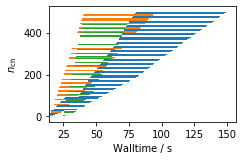

In [68]:
fig = plt.figure(figsize=(3.46, 3.46 / golden_ratio))
ax = fig.add_axes([0.2, 0.2, 0.75, 0.75])

for index, row in dframe_file.iterrows(): 
    offset = (row["time_pub"] - toff_run1)
    offset = offset.seconds + offset.microseconds * 1e-6
    ax.barh(y=row["tidx"] + 0.5, width=row["delta_secs"], left=offset, fc="C0", height=0.5)

for index, row in dframe_2node.iterrows():
    offset = (row["time_pub"] - toff_run2)
    offset = offset.seconds + offset.microseconds * 1e-6
    ax.barh(y=row["tidx"], width=row["delta_secs"], left=offset, fc="C1", height=0.5)


for index, row in dframe_3node.iterrows():    
    offset = (row["time_pub"] - toff_run3)
    offset = offset.seconds + offset.microseconds * 1e-6
    ax.barh(y=row["tidx"], width=row["delta_secs"], left=offset, fc="C2", height=0.5)

    
ax.set_xlabel(r"Walltime / s")
ax.set_ylabel(r"$n_\mathrm{ch}$")

fig.savefig("performance_time_subcon.png", dpi=300)

In [ ]:
dframe["time_fft_secs"] = dframe["time_fft"].apply(lambda x: x.seconds + x.microseconds * 1e-6)